In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
my_df = pd.DataFrame(iris.data, columns=iris.feature_names)
my_df['target'] = iris.target
my_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
my_df[my_df['target']==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
my_df[my_df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
my_df[my_df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
# Splitting the datasets according to the variety, based on target value
df0 = my_df[:50]
df1 = my_df[50:100]
df0 = my_df[100:]

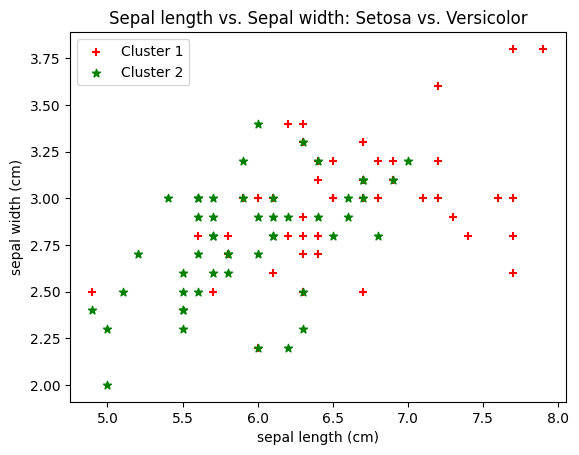

In [12]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='+', label= 'Cluster 1')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', marker='*', label= 'Cluster 2')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')
plt.title('Sepal length vs. Sepal width: Setosa vs. Versicolor')
plt.legend()
plt.show()

In [13]:
inputs = my_df.drop(columns=['target'])
target = my_df['target']
inputs.shape, target.shape

((150, 4), (150,))

In [14]:
#Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training data sets: ", inputs_train.shape, target_train.shape)
print("Testing data sets: ", inputs_test.shape, target_test.shape)

Training data sets:  (120, 4) (120,)
Testing data sets:  (30, 4) (30,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)


In [23]:
#Training the KNN model using training data
model.fit(inputs_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
model.score(inputs_test, target_test)

1.0

In [25]:
# Finding predicted values from the model
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((30,), (30,))

Model accuracy score:  1.0
Model precision score:  1.0
Model f1 score:  1.0
Model recall score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



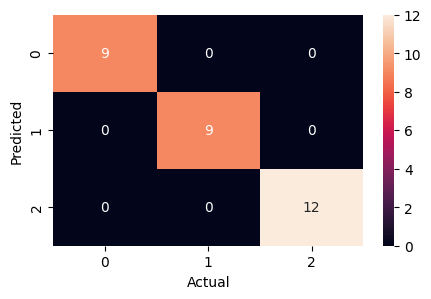

In [29]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
#print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, average='macro'))
#print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

print(classification_report(target_test, target_pred))